In [98]:
import pandas as pd
import matplotlib.pyplot as plt

## Load

In [ ]:
import pathlib

datas = []
for path in pathlib.Path("data_files").iterdir():
    if path.is_file() and path.suffix == ".csv":
        datas.append(pd.read_csv(path))
print(datas)

[          AF3       F7       F3      FC5       T7        P       O1       O2  \
0     4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1     4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2     4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3     4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4     4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2991  4297.44  3990.26  4267.69  4120.51  4328.21  4625.64  4087.18  4617.95   
2992  4297.44  3986.67  4265.13  4118.97  4324.62  4617.95  4081.03  4619.49   
2993  4295.90  3989.23  4268.21  4123.08  4325.13  4613.85  4071.79  4612.82   
2994  4300.00  3994.36  4272.31  4121.54  4328.72  4621.54  4080.00  4614.36   
2995  4301.54  3990.26  4267.18  4109.74  4328.21  4627.18  4086.15  4622.05   

           P8       T8      FC6       

## Split

In [259]:
train_set = pd.concat(datas[1:]).reset_index(drop=True)
valid_set = datas[0].iloc[:len(datas[0])//2]
test_set = datas[0].iloc[len(datas[0])//2:]

X_train = train_set.drop('eye_state', axis=1)
y_train = train_set['eye_state']
X_valid = valid_set.drop('eye_state', axis=1)
y_valid = valid_set['eye_state']
X_test = test_set.drop('eye_state', axis=1)
y_test = test_set['eye_state']

## Preprocess

In [260]:
def filter_peaks(data:pd.Series, threshold=1000):
    mask = (data.mean() + threshold < data) | (data.mean() - threshold > data)
    data.loc[mask] = data.mean()
    return data

In [261]:
def normalize_data(data:pd.DataFrame):
    return (data - data.mean()) / data.std()

In [262]:
def pipeline(data):
    data = data.apply(filter_peaks, axis=0, args=(300,))
    data = normalize_data(data)
    return data

X_train_p = pipeline(X_train)
X_valid_p = pipeline(X_valid)
X_test_p = pipeline(X_test)

eye_state
1    6730
2    5254
Name: count, dtype: int64


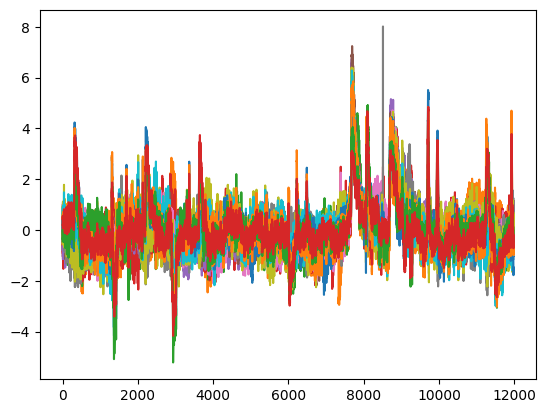

eye_state
2    845
1    653
Name: count, dtype: int64


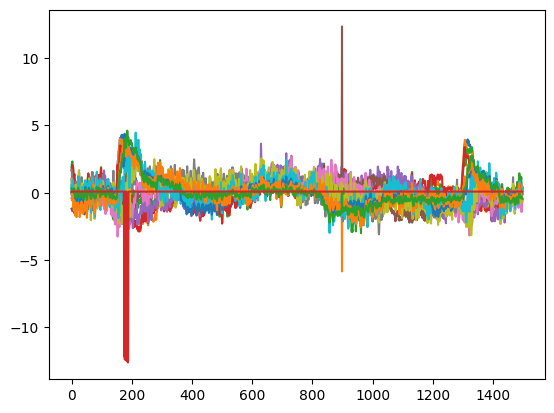

eye_state
1    874
2    624
Name: count, dtype: int64


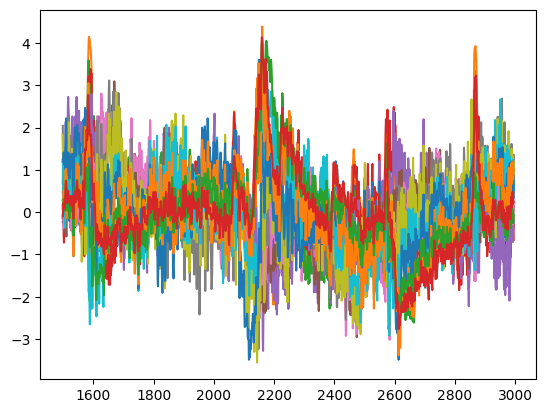

In [263]:
print(y_train.value_counts())
plt.plot(X_train_p)
plt.show()
print(y_valid.value_counts())
plt.plot(X_valid_p)
plt.show()
print(y_test.value_counts())
plt.plot(X_test_p)
plt.show()

## Model

In [271]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_p, y_train)
print("Train accuracy:", model.score(X_train_p, y_train))
print("Valid accuracy:", model.score(X_valid_p, y_valid))
print("Test accuracy:", model.score(X_test_p, y_test))

Train accuracy: 0.6804906542056075
Valid accuracy: 0.3437917222963952
Test accuracy: 0.6675567423230975


In [272]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_p, y_train)
print("Train accuracy:", model.score(X_train_p, y_train))
print("Valid accuracy:", model.score(X_valid_p, y_valid))
print("Test accuracy:", model.score(X_test_p, y_test))

Train accuracy: 1.0
Valid accuracy: 0.3684913217623498
Test accuracy: 0.6809078771695594


In [273]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_p, y_train)
print("Train accuracy:", model.score(X_train_p, y_train))
print("Valid accuracy:", model.score(X_valid_p, y_valid))
print("Test accuracy:", model.score(X_test_p, y_test))

Train accuracy: 1.0
Valid accuracy: 0.4225634178905207
Test accuracy: 0.5467289719626168
